In [1]:
# Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Importing Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.4.1'

In [4]:
#Loading Cifar Dataset

cifar_dt = keras.datasets.cifar10

In [5]:
#Train - Test on cifar10 dataset
(X_train, y_train), (X_test, y_test) = cifar_dt.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [6]:
#Viewing Train Data
X_train.shape
# 50,000 obs for train set and 32,32, 2  d-pixel  

(50000, 32, 32, 3)

In [7]:
#Viewing Test Data
X_test.shape
# 10,000 obs for test set

(10000, 32, 32, 3)

In [8]:
# from these we classes we are going to predict class of our image with help of CNN model
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
y_train[:-3]   #We have 2D array we want to convert in 1D array

array([[6],
       [9],
       [9],
       ...,
       [0],
       [2],
       [6]], dtype=uint8)

In [11]:
y_train.reshape(-1,) # Reshaping array to 1D array

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

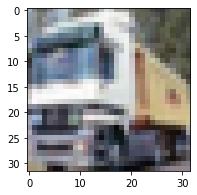

In [12]:
# Viewing our data image form train dataset
plt.figure(figsize=(8,3))
plt.imshow(X_train[1])


In [13]:
# Data-Reshaping is Not Required Since our Input image is already an 3D image

#DATA_NORMALIZATION
X_train_n = X_train / 255
X_test_n = X_test  / 255

In [14]:
# Train-Test-Validation
X_valid , X_train = X_train_n[:5000], X_train_n[5000:]
y_valid , y_train = y_train[:5000], y_train[5000:]
X_test = X_test_n

In [15]:
# Creating A Model, we are taking sequential model over functional model since our data is not complex
model = keras.models.Sequential()


In [16]:
#Adding 1st Convloutional Layer
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides= 1, padding= 'valid', activation = 'relu', input_shape =(32,32,3)))


In [17]:
# Adding 1st Max Pooling Layer
model.add(keras.layers.MaxPooling2D((2,2)))

In [18]:
# Adding 2nd Convolutional Layer
model.add(keras.layers.Conv2D(filters=32, kernel_size= (3,3), strides= 1, padding = 'valid', activation= 'relu', input_shape = (32,32,3)))

In [19]:
# Adding 2nd max pooling layer
model.add(keras.layers.MaxPooling2D((2,2)))

In [20]:
# Adding ANN Layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
# since our model has 10 classifier we have to use 10 neurons in softmax Layer

In [21]:
model.summary()  #summary of our model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               345900    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               4

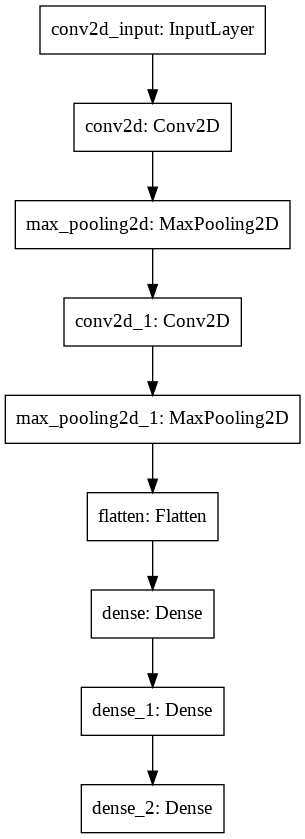

In [22]:
# Viewing the Convolutional Layer of our Model
keras.utils.plot_model(model)

In [23]:
# Compiling Our CNN Model
model.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'sgd',
               metrics = ['accuracy'])

In [24]:
# fitting our model
model_history = model.fit(X_train, y_train, epochs = 10,validation_data= (X_valid, y_valid))

Epoch 1/10
1407/1407 [==============================] - 60s 42ms/step - loss: 2.1688 - accuracy: 0.2018 - val_loss: 1.8565 - val_accuracy: 0.3180
Epoch 2/10
1407/1407 [==============================] - 49s 35ms/step - loss: 1.7138 - accuracy: 0.3844 - val_loss: 1.6394 - val_accuracy: 0.3986
Epoch 3/10
1407/1407 [==============================] - 50s 35ms/step - loss: 1.4925 - accuracy: 0.4621 - val_loss: 1.5818 - val_accuracy: 0.4412
Epoch 4/10
1407/1407 [==============================] - 49s 35ms/step - loss: 1.3887 - accuracy: 0.5030 - val_loss: 1.3263 - val_accuracy: 0.5274
Epoch 5/10
1407/1407 [==============================] - 50s 36ms/step - loss: 1.3025 - accuracy: 0.5371 - val_loss: 1.3017 - val_accuracy: 0.5412
Epoch 6/10
1407/1407 [==============================] - 50s 35ms/step - loss: 1.2158 - accuracy: 0.5714 - val_loss: 1.4632 - val_accuracy: 0.4884
Epoch 7/10
1407/1407 [==============================] - 49s 35ms/step - loss: 1.1526 - accuracy: 0.5932 - val_loss: 1.1310 -

More Accuracy Can be achieved by running more epochs and use batch_size

In [25]:
# Evaluting and predicting
ev = model.evaluate(X_test, y_test)
# model accuracy > 50 is good model
# we can increase accuracy and reduce loss function by adding another conv2d layer or running more epochs

313/313 [==============================] - 4s 11ms/step - loss: 1.1042 - accuracy: 0.6120


In [26]:
ev

[1.1041686534881592, 0.6119999885559082]

In [27]:
# now testing our model
X_new = X_test[:3]

In [28]:
y_pred = model.predict_classes(X_new)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
y_pred

array([3, 8, 8])

In [30]:
y_test[:3]   #we can see that our first three predicted Value And Test value are Sae

array([[3],
       [8],
       [8]], dtype=uint8)

In [31]:
# Viewing Class-name of our predicted Data
np.array(class_names)[y_pred]

array(['cat', 'ship', 'ship'], dtype='<U10')

In [32]:
# Viewing Class-name of our Test Data
np.array(class_names)[y_test[:3]]


array([['cat'],
       ['ship'],
       ['ship']], dtype='<U10')

AxesImage(72,27;446.4x163.08)


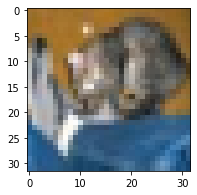

In [34]:
#printing output
plt.figure(figsize=(8,3))
print(plt.imshow(X_test[0]))